In [1]:
import numpy as np

def calculate_degrees():

    data = np.load("F:\\Soft_arm\\Code_br2\\result_2.15_extreme_test\\data\\br2_data.npz")
    # data = np.load("F:\\Soft_arm\\Code_br2\\result_2_15\\data\\br2_data.npz")

    director_total = data["director_rod_0"][-1,...]

    theta = 0
    rotation_degree = 0

    #not sure it should be done from left to right or opposite
    for i in range(0,director_total.shape[2]-1,1):
        director_1 = director_total[:,:,i]
        director_2 = director_total[:,:,i+1]
        rot_matrix = cal_rotate(director_1,director_2)
        theta = np.arccos((np.trace(rot_matrix)-1)/2)
        rotation_degree = rotation_degree + theta

    

    print(np.degrees(rotation_degree))
    
    return np.degrees(rotation_degree)

def cal_rotate(R1,R2):
    rot_matrix = R1.T @ R2
    return rot_matrix

def main():
    # """test cal_rotate
    R1 = np.array([[0, 1, 0],
               [0, 0, 1],
               [1, 0, 0]])

    R2 = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])
    rot_matrix=cal_rotate(R1,R2)
    print(np.degrees(np.arccos((np.trace(rot_matrix)-1)/2)))
    # """
    
    # calculate_degrees()
    
if __name__ == "__main__" :
    main()

120.00000000000001


In [2]:
import numpy as np

rot_degrees = [1,2,3,4,5,6]
rot_degrees = np.array(rot_degrees)

rot_degrees = np.append(rot_degrees,7)

with open('F:\\Soft_arm\\code\\rot_degree.txt','w') as file:
    file.writelines([str(d)+' ' for d in rot_degrees])
    file.write('\n')

(40,)
(40,)


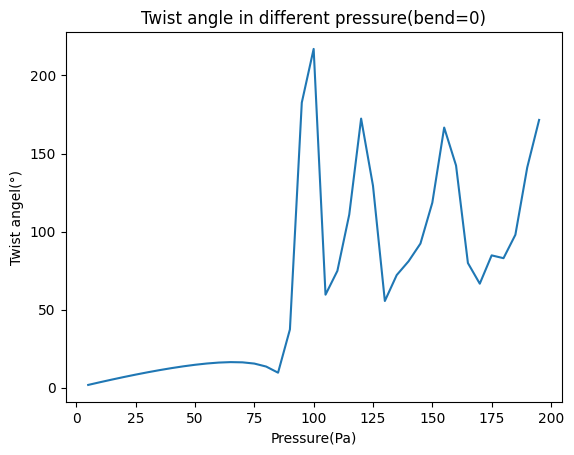

In [11]:
import matplotlib.pyplot as plt

y = np.loadtxt("F:\\Soft_arm\\Code_br2\\BR2-simulator\\GJM\\2.15\\rot_degree.txt")

print(np.shape(y))

x = range(0,200,5)

print(np.shape(x))

plt.figure()

plt.plot(x,y)

plt.title('Twist angle in different pressure(bend=0)')
plt.xlabel('Pressure(Pa)')
plt.ylabel('Twist angel(°)')

plt.show()



In [29]:
import numpy as np

def calculate_degrees(director_total):

    # data = np.load("F:\\Soft_arm\\Code_br2\\result_2.15_extreme_test\\data\\br2_data.npz")
    # data = np.load("F:\\Soft_arm\\Code_br2\\result_2_15\\data\\br2_data.npz")

    # director_total = data["director_rod_0"][-1,...]

    theta = 0
    rotation_degree = 0

    #not sure it should be done from left to right or opposite
    for i in range(0,director_total.shape[2]-1,1):
        director_1 = director_total[:,:,i]
        director_2 = director_total[:,:,i+1]
        rot_matrix = cal_rotate(director_1,director_2)
        theta = np.arccos((np.trace(rot_matrix)-1)/2)
        rotation_degree = rotation_degree + theta

    

    print(np.degrees(rotation_degree))
    
    return np.degrees(rotation_degree)

def cal_rotate(R1,R2):
    rot_matrix = R1.T @ R2
    return rot_matrix


create test condition

In [41]:
import numpy as np

def create_rotation_matrix(axis, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_angle = np.cos(angle_radians)
    sin_angle = np.sin(angle_radians)

    if axis == 'x':
        return np.array([
            [1, 0, 0],
            [0, cos_angle, -sin_angle],
            [0, sin_angle, cos_angle]
        ])
    elif axis == 'y':
        return np.array([
            [cos_angle, 0, sin_angle],
            [0, 1, 0],
            [-sin_angle, 0, cos_angle]
        ])
    elif axis == 'z':
        return np.array([
            [cos_angle, -sin_angle, 0],
            [sin_angle, cos_angle, 0],
            [0, 0, 1]
        ])

# 创建两个旋转矩阵
test_total = np.array([[1,0,0],[0,1,0],[0,0,1]])
for i in range(10):
    R1 = create_rotation_matrix('z', i*10)  # 绕Z轴旋转90度
    # R2 = create_rotation_matrix('y', 0)  # 绕Y轴旋转90度
    test_total = np.dstack((test_total,R1))
    # test_total = np.dstack((test_total,R2))
print(np.shape(test_total))

# 使用你的函数计算总旋转角度
total_rotation_degree = calculate_degrees(test_total)

print("Total rotation degree:", total_rotation_degree)

(3, 3, 11)
89.99999999999986
Total rotation degree: 89.99999999999986


 position_rod_0=position_rod_0[:,:,-1],#just record the tip position

In [13]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load("F:\\Soft_arm\\Code_br2\\BR2-simulator\\result_2_16\\data\\br2_data.npz") #tip pos relating to bend/twist pressure will be stocked here

tip_pos = data["position_rod_0"]#just have the last step tip position
#need another file to store it 
print(np.shape(tip_pos))

print(tip_pos)




(26, 3)
[[ 0.00000000e+00  1.48125000e-01  0.00000000e+00]
 [-4.51111581e-04  1.48068634e-01  3.81107473e-05]
 [-1.69793066e-03  1.47946304e-01  1.44477376e-04]
 [-3.71084356e-03  1.47729364e-01  2.99106322e-04]
 [-6.39832364e-03  1.47327306e-01  4.73671166e-04]
 [-9.65175390e-03  1.46698295e-01  6.32564752e-04]
 [-1.29883361e-02  1.46005396e-01  6.65242435e-04]
 [-1.59925588e-02  1.45313997e-01  5.18488308e-04]
 [-1.86105299e-02  1.44646900e-01  2.55942600e-04]
 [-2.08660086e-02  1.44056500e-01 -7.26460496e-05]
 [-2.27995589e-02  1.43541804e-01 -4.37047606e-04]
 [-2.44523510e-02  1.43101454e-01 -8.16842016e-04]
 [-2.58625003e-02  1.42719600e-01 -1.19904176e-03]
 [-2.70592566e-02  1.42363517e-01 -1.57400724e-03]
 [-2.80711642e-02  1.42016361e-01 -1.93514744e-03]
 [-2.89279442e-02  1.41689927e-01 -2.27816443e-03]
 [-2.96539675e-02  1.41390876e-01 -2.60106373e-03]
 [-3.02703466e-02  1.41131714e-01 -2.90266516e-03]
 [-3.07957295e-02  1.40922885e-01 -3.18291086e-03]
 [-3.12424651e-02  1.40

position_rod_0=position_rod_0

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load("F:\\Soft_arm\\Code_br2\\BR2-simulator\\result_2_16\\data\\br2_data.npz") #tip pos relating to bend/twist pressure will be stocked here

tip_pos = data["position_rod_0"]#just have the last step tip position
#need another file to store it 
print(np.shape(tip_pos))

print(tip_pos)


(26, 3, 41)
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.19512195e-03  6.58536585e-03  1.09756098e-02 ...  1.69024390e-01
    1.73414634e-01  1.77804878e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-3.19136461e-07 -2.17469906e-06 -6.17117022e-06 ... -8.38478617e-04
   -9.20235908e-04 -1.02610551e-03]
  [ 2.19578410e-03  6.58731138e-03  1.09787397e-02 ...  1.68979524e-01
    1.73366304e-01  1.77753629e-01]
  [ 1.68234979e-06  7.93105087e-06  1.86269055e-05 ...  2.49770246e-04
    2.57274334e-04  2.66418568e-04]]

 [[-1.60724018e-06 -9.94159632e-06 -2.71685826e-05 ... -3.01244320e-03
   -3.22540194e-03 -3.48635063e-03]
  [ 2.19281176e-03  6.57833307e-03  1.09636257e-02 ...  1.68730622e-01
    1.73109688e-01  1.77488448e-01]
  [ 4.31473229e-06  2.11361024e-05  5.08733035e-05 ...  9.43183793e-04
    9.71993378e-04  1.00745041e-03]]

 ...

 [[-7.4260456

(6, 10)


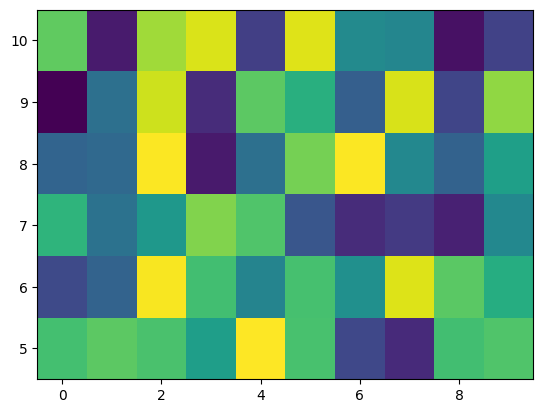

In [14]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
print(np.shape(Z))
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

[[ 1.14029701e-07 -3.25045113e-02]
 [-2.92280261e-04 -3.27607549e-02]]
(2, 2)
(3, 3)


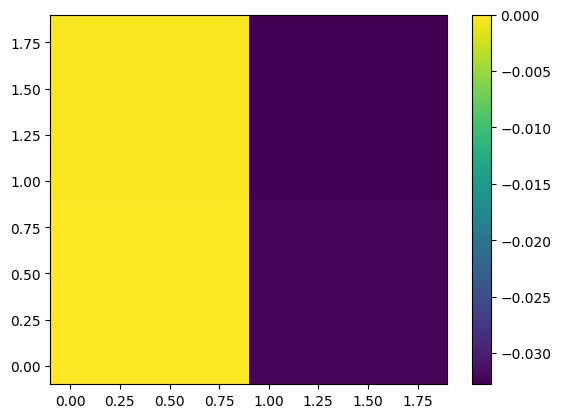

In [30]:
data = np.load("F:\\Soft_arm\\Code_br2\\BR2-simulator\\GJM\\2.15\\tip_pose.npz")
tip_pos = data["tip_pos"]#（3,j,i) j is the twist pressure; i is the bend pressure

x_tip_pos = tip_pos[0,...]
y_tip_pos = tip_pos[1,...]
z_tip_pos = tip_pos[2,...]
print(x_tip_pos)
print(np.shape(x_tip_pos))

step = 20
x = np.arange(-0.1,2.9,1)
y = np.arange(-0.1,2.9,1)
X,Y = np.meshgrid(x,y)
print(np.shape(X))
Z = x_tip_pos
# z_x_min, z_x_max = 0, np.abs(x_tip_pos).max()

plt.figure()
plot_x = plt.pcolormesh(X,Y,Z)
plt.colorbar(plot_x)
plt.show()


(2, 2)


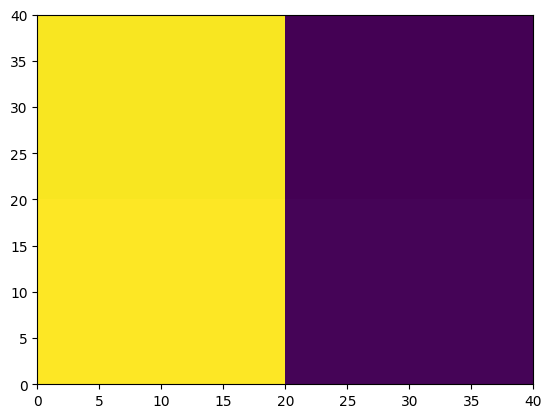

In [32]:
np.random.seed(19680801)
Z = x_tip_pos
print(np.shape(Z))
x = np.arange(0, 41, 20)  # len = 11
y = np.arange(0, 41, 20)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

(2, 2)


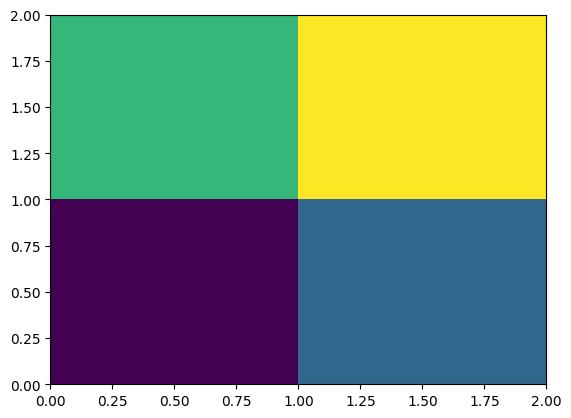

In [35]:
x = np.array([0, 1, 2])  # For the X boundaries
y = np.array([0, 1, 2])  # For the Y boundaries
X, Y = np.meshgrid(x, y)

Z=np.array([[0,1],[2,3]])
print(np.shape(Z))


fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)